In [122]:
import pandas as pd
import numpy as np

In [123]:
df = pd.read_csv('train.csv')

In [124]:
df.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10421,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,In-flight meal not included,10844
6735,Jet Airways,9/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,04:25 10 Jun,8h 55m,2 stops,No info,13014
5548,Multiple carriers,27/03/2019,Delhi,Cochin,DEL → HYD → COK,13:05,22:20,9h 15m,1 stop,No info,6076
8031,Jet Airways,9/05/2019,Banglore,Delhi,BLR → DEL,19:50,22:50,3h,non-stop,In-flight meal not included,3502
694,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,14:25 13 May,21h 25m,1 stop,No info,13067
6797,Air India,24/05/2019,Kolkata,Banglore,CCU → BBI → HYD → BLR,09:10,11:05 25 May,25h 55m,2 stops,No info,6117
2765,IndiGo,12/05/2019,Banglore,Delhi,BLR → DEL,21:15,00:15 13 May,3h,non-stop,No info,3943
10012,IndiGo,27/03/2019,Chennai,Kolkata,MAA → CCU,22:05,00:25 28 Mar,2h 20m,non-stop,No info,5277
8631,Jet Airways,18/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 19 May,13h 30m,2 stops,No info,15129
8923,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,15058


In [125]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [126]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [127]:
df.shape

(10683, 11)

In [128]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [129]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### EDA

In [130]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [131]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

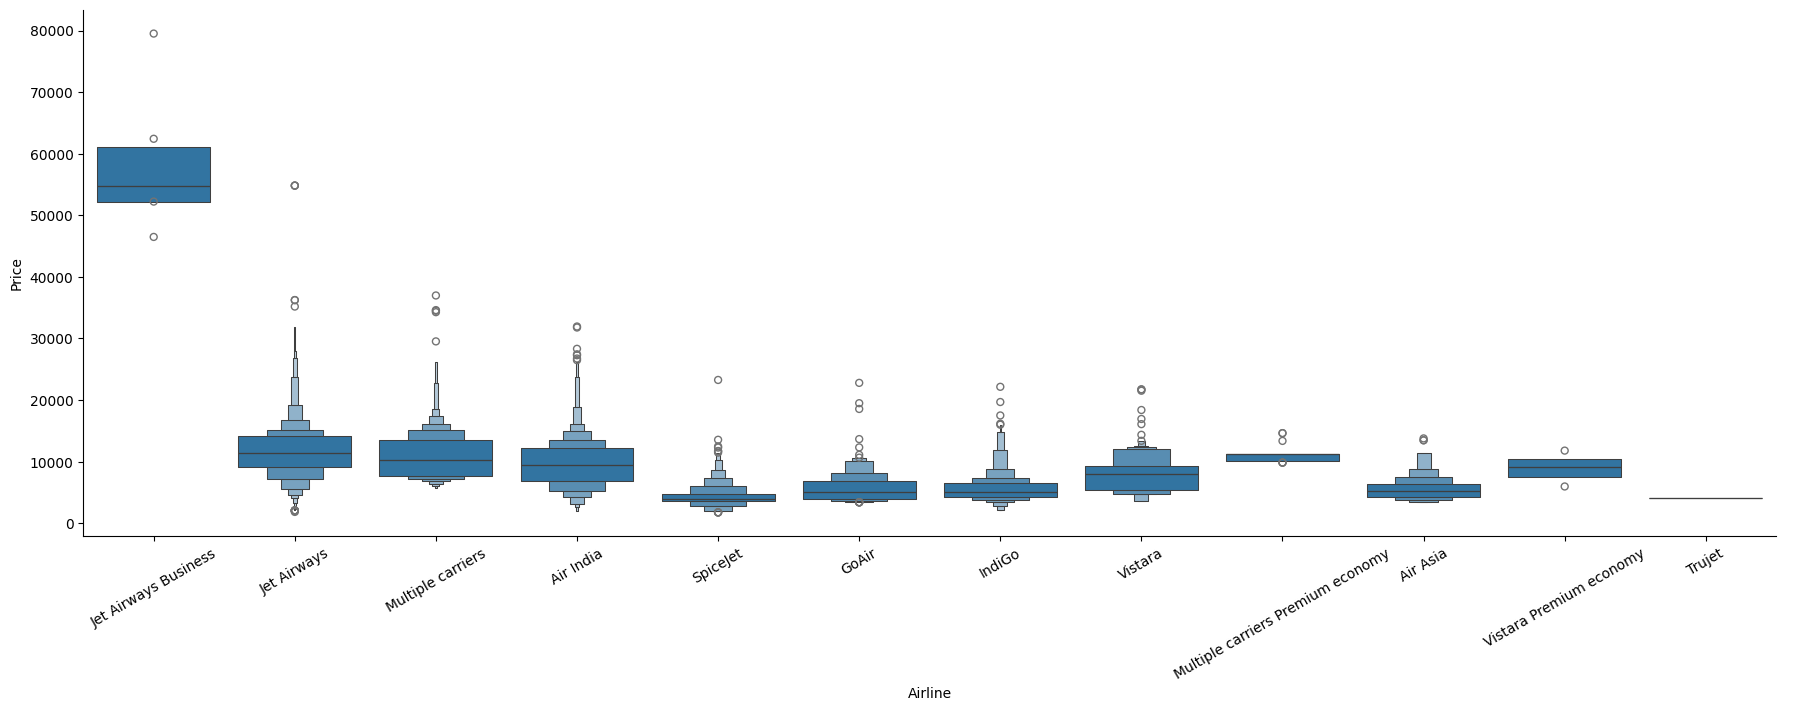

In [132]:
# Airline vs Price
ax = sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
ax.set_xticklabels(rotation=30)
plt.show()

* Jet air bussiness ways have the highest price
* All other all similar

In [133]:
df.groupby(['Airline', 'Destination']).size().reset_index()

,Airline,Destination,0
0,Air Asia,Banglore,150
1,Air Asia,Cochin,80
2,Air Asia,Delhi,71
3,Air Asia,New Delhi,18
4,Air India,Banglore,512
5,Air India,Cochin,747
6,Air India,Delhi,120
7,Air India,Hyderabad,136
8,Air India,Kolkata,25
9,Air India,New Delhi,212


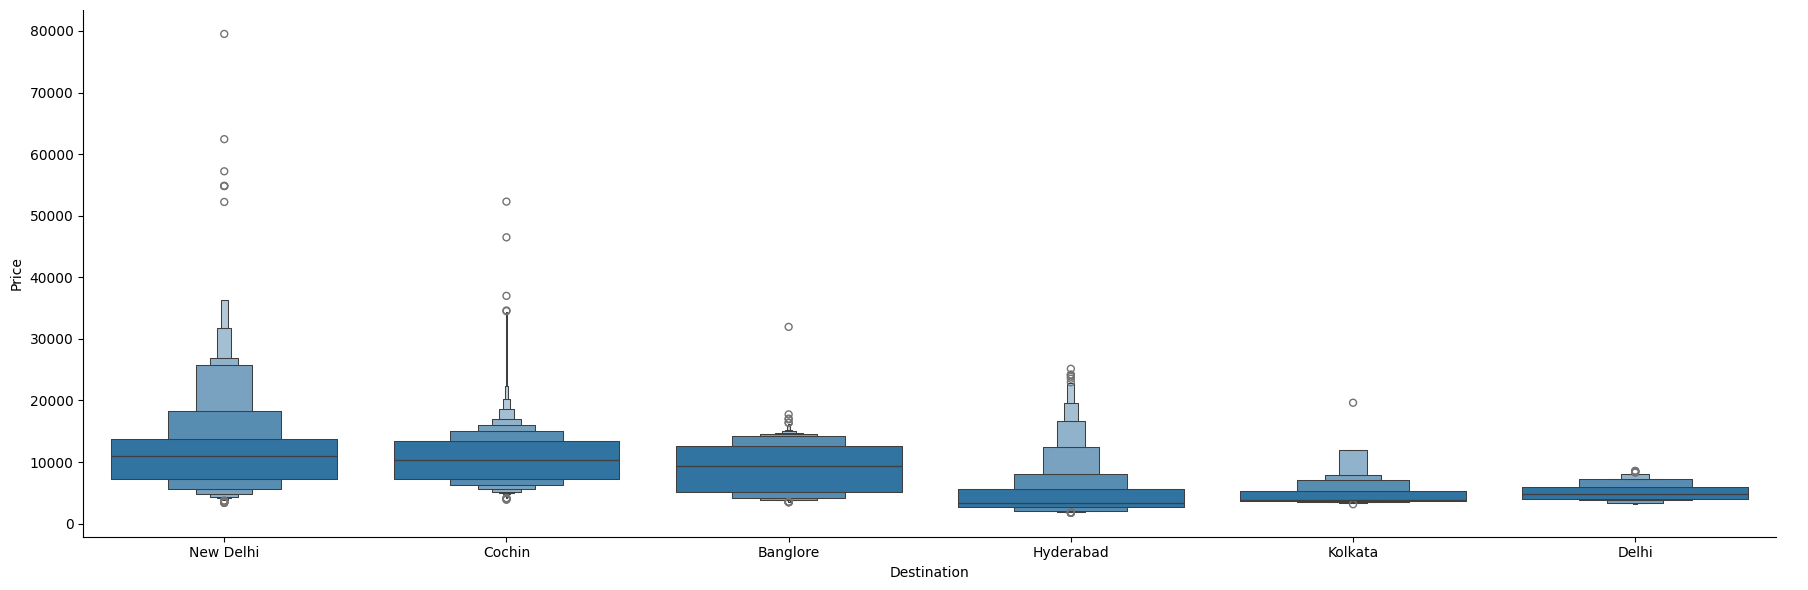

In [134]:
# Price vs Destination
ax = sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [135]:
# Changing Date Format
df['day'] = df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
df['month'] = df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
df['year'] = df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [136]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [137]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  day              10683 non-null  int32 
 12  month            10683 non-null  int32 
 13  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [139]:
df.drop('Date_of_Journey',axis = 1, inplace = True)

In [140]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [141]:
df['Arrival_hour'] = df['Arrival_Time'].apply(lambda x:x.split(':')[0])
df['Arrival_minutes'] = df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [142]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_minutes'] = df['Arrival_minutes'].astype(int)

In [143]:
df.drop('Arrival_Time',axis = 1, inplace = True)

In [144]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [145]:
df['Dept_hour'] = df['Dep_Time'].apply(lambda x:x.split(':')[0])
df['Dept_minutes'] = df['Dep_Time'].apply(lambda x:x.split(':')[1])

df['Dept_hour'] = df['Dept_hour'].astype(int)
df['Dept_minutes'] = df['Dept_minutes'].astype(int)

df.drop('Dep_Time',axis = 1, inplace = True)

In [146]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [147]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [148]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

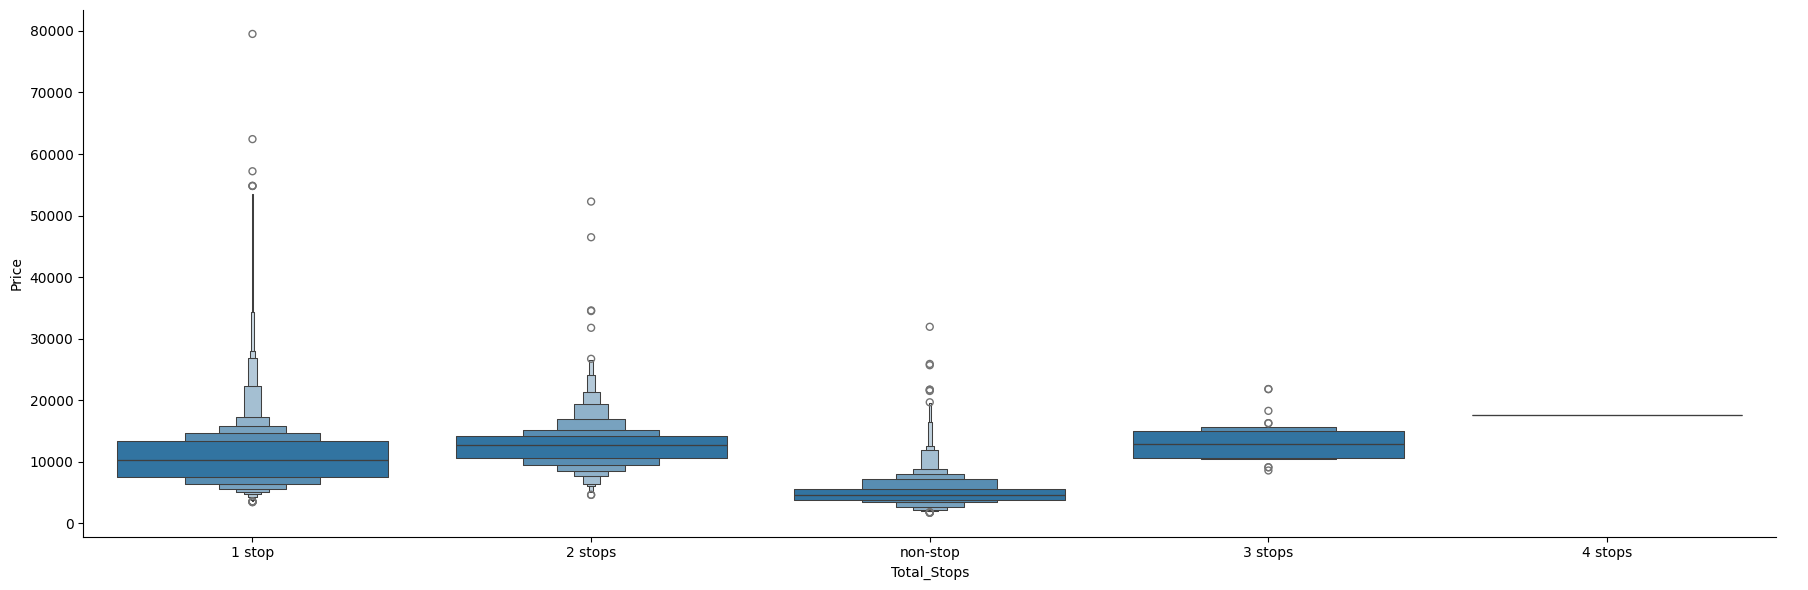

In [149]:

sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show

In [150]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [151]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':1, '1 stop' : 2, '3 stops' : 3, '4 stops' : 4, 'nan' : 1})

In [152]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

* Since it is eaiser to handle no_of stops than route, so we are dropping route
* Additional info is 80% 'no_info' so it will not help

In [153]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,1.0,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,13302,1,3,2019,21,35,16,50


In [154]:
df.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops        float64
Price                int64
day                  int32
month                int32
year                 int32
Arrival_hour         int32
Arrival_minutes      int32
Dept_hour            int32
Dept_minutes         int32
dtype: object

In [155]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: 
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i].strip() 

duration_hours = []
duration_mins = []


for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0].strip()))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1].strip()))


In [156]:
df['Duration_hours'] = duration_hours
df['Duration_minutes'] = duration_mins

In [157]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,13302,1,3,2019,21,35,16,50,4,45


In [158]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price               0
day                 0
month               0
year                0
Arrival_hour        0
Arrival_minutes     0
Dept_hour           0
Dept_minutes        0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [159]:
df.dropna(subset = ['Total_Stops'], inplace=True)

In [160]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         0
Price               0
day                 0
month               0
year                0
Arrival_hour        0
Arrival_minutes     0
Dept_hour           0
Dept_minutes        0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Duration          10682 non-null  object 
 4   Total_Stops       10682 non-null  float64
 5   Price             10682 non-null  int64  
 6   day               10682 non-null  int32  
 7   month             10682 non-null  int32  
 8   year              10682 non-null  int32  
 9   Arrival_hour      10682 non-null  int32  
 10  Arrival_minutes   10682 non-null  int32  
 11  Dept_hour         10682 non-null  int32  
 12  Dept_minutes      10682 non-null  int32  
 13  Duration_hours    10682 non-null  int64  
 14  Duration_minutes  10682 non-null  int64  
dtypes: float64(1), int32(7), int64(3), object(4)
memory usage: 1.0+ MB


In [162]:
df.drop('Duration',axis = 1, inplace = True)

In [163]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,16,50,4,45


In [164]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [165]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### HANDLING CAT DATA

In [166]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True, dtype=int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [167]:
df["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [168]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True, dtype=int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [169]:
df["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [170]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True, dtype=int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [171]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,16,50,4,45


In [172]:
train_df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [173]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,...,0,0,0,0,0,0,0,0,0,1


In [174]:
train_df.drop(["Airline", "Source", "Destination","year"], axis = 1, inplace = True)

In [175]:
train_df.head()

,Total_Stops,Price,day,month,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1.0,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1.0,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,2.0,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,2.0,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [176]:
train_df.shape

(10682, 30)

In [177]:
train_df.isna().sum()

Total_Stops                                  0
Price                                        0
day                                          0
month                                        0
Arrival_hour                                 0
Arrival_minutes                              0
Dept_hour                                    0
Dept_minutes                                 0
Duration_hours                               0
Duration_minutes                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

### feature Selection

In [178]:
train_df.columns

Index(['Total_Stops', 'Price', 'day', 'month', 'Arrival_hour',
       'Arrival_minutes', 'Dept_hour', 'Dept_minutes', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [179]:
X = train_df.drop(['Price'], axis=1)
Y = train_df['Price']

In [180]:
from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,Y)

ExtraTreesRegressor()

In [181]:
print(select.feature_importances_)

[2.00253514e-01 1.44389723e-01 5.29142551e-02 2.83031097e-02
 1.92612931e-02 2.36267999e-02 2.09771449e-02 1.28456518e-01
 1.75145443e-02 1.38166203e-02 2.25339887e-03 2.34394937e-02
 1.38056074e-01 6.79954153e-02 1.29672504e-02 7.64106476e-04
 3.90273735e-03 9.86646708e-05 4.66548658e-03 8.90820478e-05
 4.29721968e-04 1.46337290e-02 3.90799517e-03 6.22435053e-03
 1.82352582e-02 1.92112213e-02 8.25105657e-03 4.60681684e-04
 2.49007544e-02]


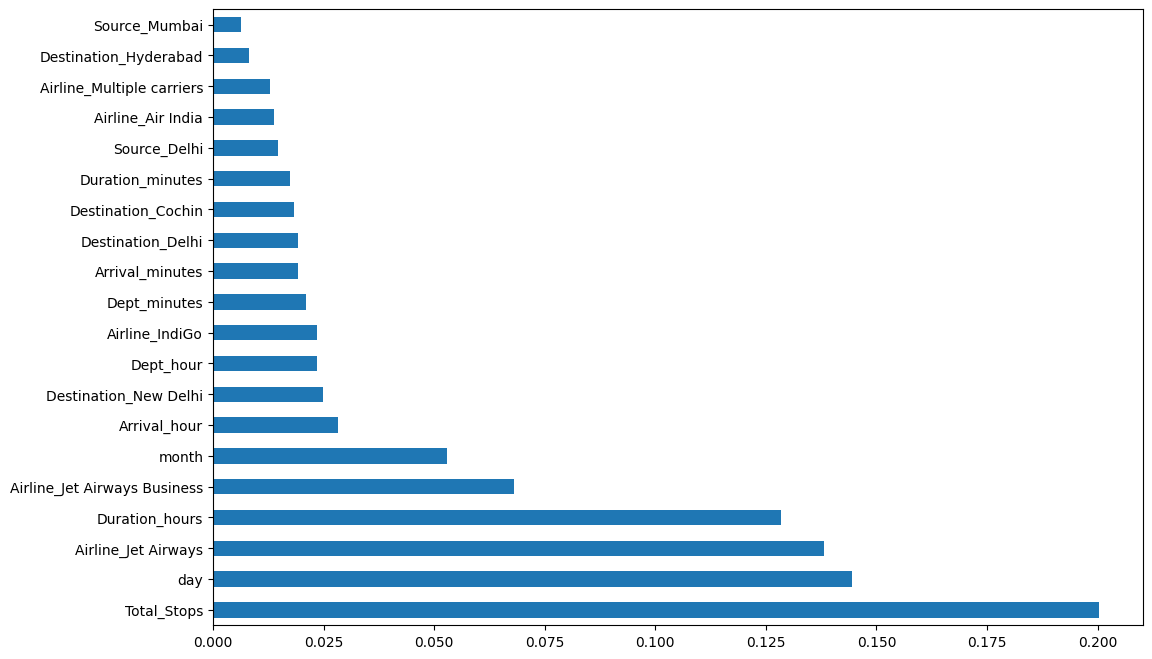

In [182]:
plt.figure(figsize = (12,8))
fig_importances = pd.Series(select.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.show()

### Random Forest

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [184]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [185]:
Y_pred = RF_reg.predict(X_test)

In [186]:
RF_reg.score(X_train, Y_train)

0.9532239619973338

In [187]:
RF_reg.score(X_test, Y_test)

0.7961916619178095

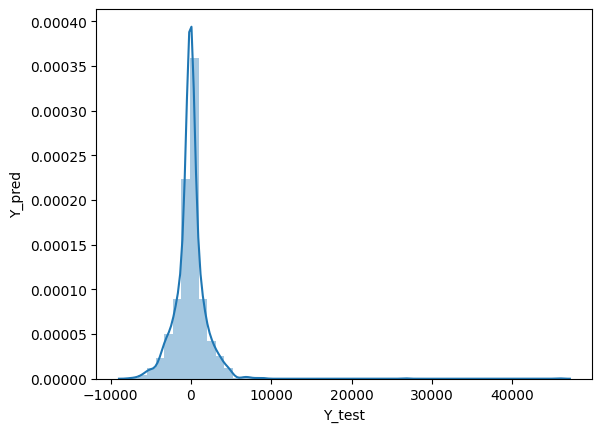

In [188]:
sns.distplot(Y_test-Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

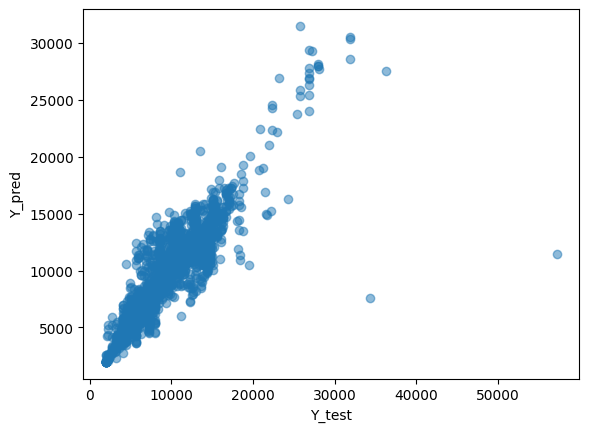

In [189]:
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [190]:
from sklearn import metrics

# calculate MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 1180.3409691244908
MSE: 4394526.865061997
RMSE: 2096.3126830370506


In [191]:
rmse/(max(Y)-min(Y))

0.026961180700899652

In [192]:
r2 = metrics.r2_score(Y_test, Y_pred)
print(r2)

0.7961916619178095


### HP TUNING

In [193]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [194]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [195]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = RF_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [196]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
prediction = rf_random.predict(X_test)

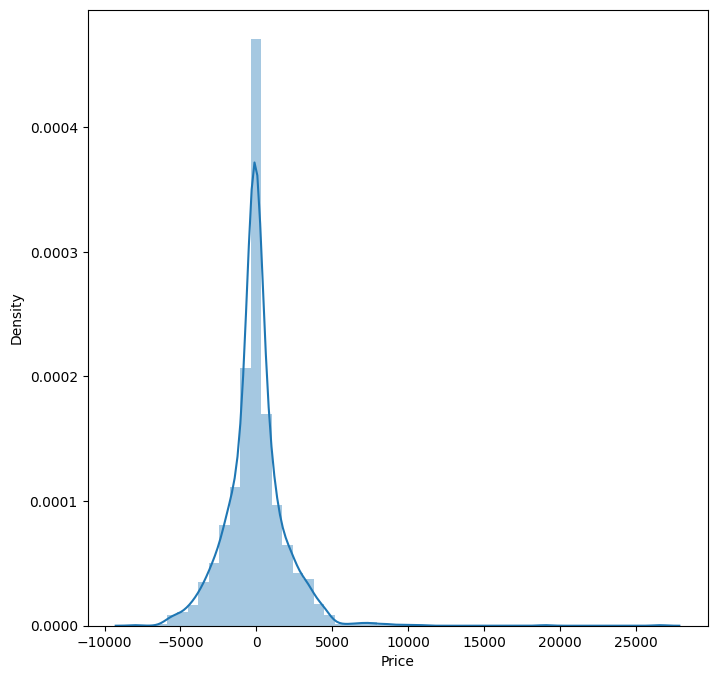

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

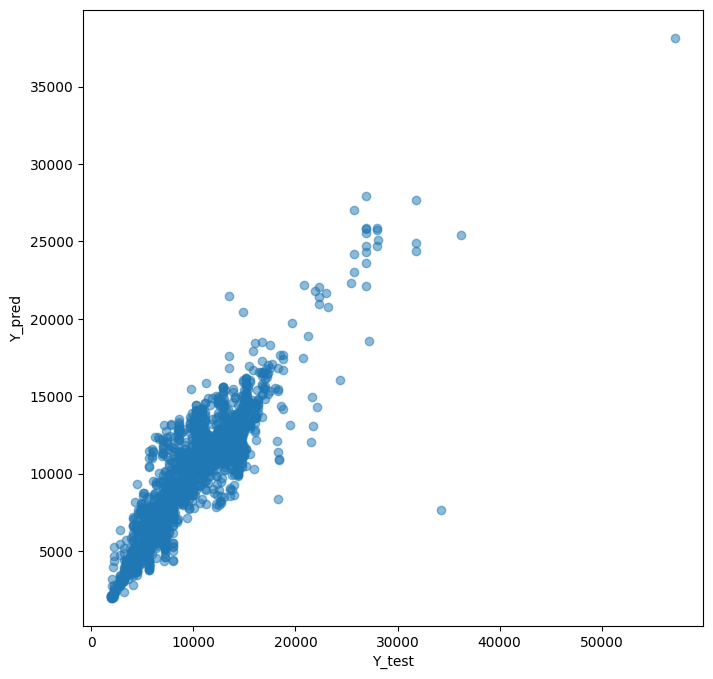

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1264.0137454854912
MSE: 3892562.242098879
RMSE: 1972.957739562325
